<img src="../figures/HeaDS_logo_large_withTitle.png" width="300">

<img src="../figures/tsunami_logo.PNG" width="600">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Center-for-Health-Data-Science/PythonTsunami/blob/fall2021/Classes/Classes.ipynb)

# Modules and Classes

*Prepared by Henry Webel at [NNF CPR](https://www.cpr.ku.dk/staff/rasmussen-group/?pure=en/persons/662319) [![Twitter](https://img.shields.io/twitter/url/https/twitter.com/cloudposse.svg?style=social&label=Follow%20%40Henrywebel)](https://twitter.com/henrywebel)*

- Pre-requisites: Python Intro, minimal Pandas, functions

## Objectives

- putting functions into separate files
- grouping related function and data into objects

## Modules

> Modules are one of Python's main abstraction layers, and probably the most natural one.  
> Abstraction layers allow a programmer to separate code into parts that hold related data and functionality.  
> (Reitz/ Schlusser : [The Hitchhiker's Guide to Python, Modules](https://docs.python-guide.org/writing/structure/#modules))

In [ ]:
import antigravity

What just happened?

In [ ]:
# antigravity??

Modules are importet only once in a running Python interpreter (here: IPython)

In [ ]:
import antigravity # nothing happens

You need to explicitly re-import the module using e.g. [`importlib.reload`](https://docs.python.org/3/library/importlib.html#importlib.reload)

> "Reload a previously imported module. The argument must be a module object, so it must have been successfully imported before." ([docs](https://docs.python.org/3/library/importlib.html#importlib.reload))

In [ ]:
# explicitly reimport the module
import importlib
importlib.reload(antigravity)

### A first small module

- create python files to import as module

> [`os.makedirs`](https://docs.python.org/3/library/os.html#os.makedirs) and [`%%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile) are needed to make the files available on colab.

In [ ]:
import os
os.makedirs('src', exist_ok=True)

In [ ]:
%%writefile src/__init__.py
# src init
__author__ = 'me'
__doc__ = 'hello friend.'

In [ ]:
%%writefile src/functions.py

def my_greeting(name, prefix='Hello'):
    return_string = f"{prefix}: {name}"
    return return_string

In [ ]:
import src
# # For changes to file after you importet once, you need to explicitly reimport
import importlib
importlib.reload(src)

In [ ]:
src.__author__ 

We use the built-in function `dir` to inspect the attributes of our `src`-module.

> "Without arguments, return the list of names in the current local scope. With an argument, **attempt to return a list of valid attributes for that object**." ([docs](https://docs.python.org/3/library/functions.html#dir))

In [ ]:
dir(src) # does not know "functions"

### Module annotations

Each module automatically holds some information. 

Find our discription defined before by `__doc__`:

In [ ]:
src?

### Importing Modules

There are different ways to import modules

In [ ]:
import src.functions #directory.file
src.functions.my_greeting('you')

In [ ]:
from src.functions import my_greeting
my_greeting('Henry')

In [ ]:
from src import functions
functions.my_greeting('Rita')

You can also rename imported modules using `as`

In [ ]:
from src import functions as my_own_module
my_own_module.my_greeting('Rita')

In [ ]:
dir(src) # now, it does know functions! Why?

## Packages

- extend modules to a whole folder (directory). 
- group code so that it can be brought to another computer

Next session we will look at [`numpy`](https://numpy.org/)

In [1]:
import numpy as np
np?

## Classes

- As modules, they can group code statements
- **classes** are blueprints for concrete **instances**
- Classes are "user"-defined objects: "A template for creating user-defined objects. Class definitions normally contain method definitions which operate on instances of the class." ([Glossary](https://docs.python.org/3/glossary.html))
- "built-in"-types are also classes, but maybe not defined in python directly

Reference: Python Tutorial [9.3.2](https://docs.python.org/3/tutorial/classes.html#class-objects) (You may also read the rest)

## Car example 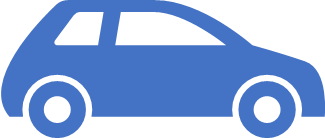

In [ ]:
class Car:
    def __init__(self, color, number_wheels, has_motor, power, has_gears, trunk_capacity):
        self.color = color
        self.number_wheels = number_wheels
        self.has_motor = has_motor
        self.power = power
        self.has_gears = has_gears
        self.gear = None
        self.trunk_capacity = trunk_capacity
        self.current_trunk_capacity = trunk_capacity
        
    def start_engine(self):
        pass
    
    def stop_engine(self):
        pass
    
    def change_gear(self, gear):
        if self.has_gear:
            self.gear = gear
            
    def break_car(self):
        pass
    
    def fill_in_trunk(self, volume):
        remaining = self.trunk_capacity - volume
        if remaining >= 0:
            self.trunk_capacity = remaining
        

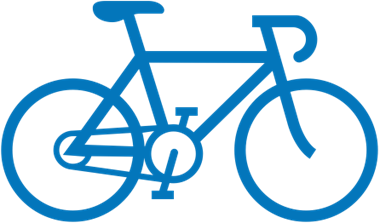

In [ ]:
class Bicycle:
    def __init__(self, color, number_wheels, has_motor, power, has_gears, has_basket):
        self.color = color
        self.number_wheels = number_wheels
        self.has_motor = has_motor
        self.power = power
        self.has_gears = has_gears
        self.gear = None
        self.has_basket = has_basket
        
    def start_engine(self):
        pass
    
    def stop_engine(self):
        pass
    
    def pedalling(self):
        pass
    
    def change_gear(self, gear):
        if self.has_gear:
            self.gear = gear
            
    def break_car(self):
        pass

## Another example: Gene

In [ ]:
class Gene:
    """My class."""
    def __init__(self, name, sequence):
        """"""
        self.name = name
        self.sequence = sequence

    def count_bases(self):
        pass

    def gc_content(self):
        pass

    def __repr__(self):
        return f'{self.__class__.__name__}(name={self.name!r}, sequence={self.sequence!r})'

### Plasmid-Fasta

Example of an artifical plasmid entry, normally in a fasta file `plasmid.fa`
```
>pla
ATGAAGAAAAGTTCTATTGTGGCAACCATTATAACTATTCTGTCCGGGAGTGCTAATGCAGCATCATCTCAGTTAATACC
AAATATATCCCCTGACAGCTTTACAGTTGCAGCCTCCACCGGGATGCTGAGTGGAAAGTCTCATGAAATGGTTTATGACG
CAGAAACAGGAAGAAAGATCAGCCAGTTAGACTGGAAGATCAAAAATGTCGCTATCCTGAAAGGTGATATATCCTGGGAT
CCATACTCATTTCTGACCCTGAATGCCAGGGGGTGGACGTCTCTGGCTTCCGGGTCAGGTAATATGGATGACTACGACTG
GATGAATGAAAATCAATCTGAGTGGACAGATCACTCATCTCATCCTGCTACAAATGTTAATCATGCCAATGAATATGACC
TCAATGTGAAAGGCTGGTTACTCCAGGATGAGAATTATAAAGCAGGTATAACAGCAGGATATCAGGAAACACGTTTCAGT
TGGACAGCTACAGGTGGTTCATATAGTTATAATAATGGAGCTTATACCGGAAACTTCCCGAAAGGAGTGCGGGTAATAGG
TTATAACCAGCGCTTTTCTATGCCATATATTGGACTTGCAGGCCAGTATCGCATTAATGATTTTGAGTTAAATGCATTAT
TTAAATTCAGCGACTGGGTTCGGGCACATGATAATGATGAGCACTATATGAGAGATCTTACTTTCCGTGAGAAGACATCC
GGCTCACGTTATTATGGTACCGTAATTAACGCTGGATATTATGTCACACCTAATGCCAAAGTCTTTGCGGAATTTACATA
CAGTAAATATGATGAGGGCAAAGGAGGTACTCAGANCATTGATAAGAATAGTGGAGATTCTGTCTCTATTGGCGGAGATG
CTGCCGGTATTTCCAATAAAAATTATACTGTGACGGCGGGTCTGCAATATCGCTTCTGA
```


In [ ]:
sequence = ("ATGAAGAAAAGTTCTATTGTGGCAACCATTATAACTATTCTGTCCGGGAGTGCTAATGCAGCATCATCTCAGTTAATACC"
"AAATATATCCCCTGACAGCTTTACAGTTGCAGCCTCCACCGGGATGCTGAGTGGAAAGTCTCATGAAATGGTTTATGACG"
"CAGAAACAGGAAGAAAGATCAGCCAGTTAGACTGGAAGATCAAAAATGTCGCTATCCTGAAAGGTGATATATCCTGGGAT"
"CCATACTCATTTCTGACCCTGAATGCCAGGGGGTGGACGTCTCTGGCTTCCGGGTCAGGTAATATGGATGACTACGACTG"
"GATGAATGAAAATCAATCTGAGTGGACAGATCACTCATCTCATCCTGCTACAAATGTTAATCATGCCAATGAATATGACC"
"TCAATGTGAAAGGCTGGTTACTCCAGGATGAGAATTATAAAGCAGGTATAACAGCAGGATATCAGGAAACACGTTTCAGT"
"TGGACAGCTACAGGTGGTTCATATAGTTATAATAATGGAGCTTATACCGGAAACTTCCCGAAAGGAGTGCGGGTAATAGG"
"TTATAACCAGCGCTTTTCTATGCCATATATTGGACTTGCAGGCCAGTATCGCATTAATGATTTTGAGTTAAATGCATTAT"
"TTAAATTCAGCGACTGGGTTCGGGCACATGATAATGATGAGCACTATATGAGAGATCTTACTTTCCGTGAGAAGACATCC"
"GGCTCACGTTATTATGGTACCGTAATTAACGCTGGATATTATGTCACACCTAATGCCAAAGTCTTTGCGGAATTTACATA"
"CAGTAAATATGATGAGGGCAAAGGAGGTACTCAGANCATTGATAAGAATAGTGGAGATTCTGTCTCTATTGGCGGAGATG"
"CTGCCGGTATTTCCAATAAAAATTATACTGTGACGGCGGGTCTGCAATATCGCTTCTGA")

gene = Gene(name='pla', sequence=sequence)
# Gene.__init__??
gene

In [ ]:
gene.sequence

In [ ]:
gene

In [ ]:
gene.count_bases() # Your turn in the exercises:)

### Exercise on classes

1. Continue the gene class that can count the number of nucleotides
    - Which type should the sequence have?
    - Which methods does the sequence type have allowing you to count?
2. Get the relative fraction of G and C over the total number of nucleotides.
    - implement it strait forwardly, but reuse `count_bases`:)
    - Extra: Think about stateful-behaviour (should the class remember things?)
3. Write the class to a file and try to import it.
    - File: `src/gene.py`
    - `from gene import Gene` should work
    > Use `import importlib(gene); importlib.reload(gene)` if you want to re-execute the import - as python normally import modules only once during the a runtime ("program execution")


In [ ]:
class Gene:
    def __init__(self, name, sequence):
        """"""
        self.name = name
        self.sequence = sequence

    def count_bases(self):
        pass

    def gc_content(self):
        pass
    
    def __repr__(self):
        return f'{self.__class__.__name__}(name={self.name!r}, sequence={self.sequence!r})'

## Excursus: Class inheritance

Classes can be based on one of each other, in order to define interfaces or re-use functionality. 

Inheritence works by adding classes in the constructor statement of new classes:

```python
class Base():

    name = 'Base'  # stored already in __class__.__name__ but repeat for the point
    count = 0


class Derived(Base):

    name = 'Derived'
```

`Derived` is also an instance of `Base`:

In [ ]:
class Base():

    name = 'Base'  # stored already in __class__.__name__ but repeat for the point
    count = 0


class Derived(Base):

    name = 'Derived'


derived = Derived()
print("derive is instance of Base:", isinstance(derived, Base))

Therefore it inherited the `count` attribute, her an `int`eger:

In [ ]:
derived.count

However, we did overwrite the `name` attribute, which is here the same as the internally stored class name:

In [ ]:
derived.name, derived.__class__.__name__

> This will be mainly of importance to understand the **scikit-learn** API better.